### Q-Learning for FrozenLake
The provided Python script is an implementation of Q-learning to solve the FrozenLake environment from OpenAI Gym. In this environment, the agent is placed on a frozen lake and must find a path to reach the goal without falling into holes. It uses a Q-table to learn the optimal actions for each state. The code employs epsilon-greedy exploration for balancing exploration and exploitation.

#### What is Q-Learning? 
Q-Learning is a popular reinforcement learning algorithm used to solve Markov decision processes (MDPs) where an agent interacts with an environment, taking actions and receiving rewards. The goal of Q-learning is to find an optimal policy for the agent to maximize its cumulative reward over time.

##### Here's how Q-learning works:

`Q-Table`: Q-learning uses a Q-table (also known as an action-value table) to store the expected cumulative rewards for each state-action pair. The Q-table is initialized with zeros.

`Exploration vs. Exploitation`: During training, the agent has a balance between exploration and exploitation. It can choose to explore new actions or exploit the knowledge it has gained from the Q-table.

`Learning Rate and Discount Factor`: Q-learning uses a learning rate (alpha) to update Q-values and a discount factor (gamma) to discount future rewards. These parameters influence how quickly the agent learns and how much importance it places on future rewards.

`Update Rule`: The agent updates the Q-values using the Q-learning update rule:
 `Q(s, a) = Q(s, a) + alpha * (reward + gamma * max(Q(s', a')) - Q(s, a))`
    
       Q(s, a) is the current Q-value for state s and action a.
    
       alpha is the learning rate.
    
       reward is the immediate reward received for taking action a in state s.

       gamma is the discount factor.

       max(Q(s', a')) represents the maximum Q-value for the next state s' and all possible actions a'.

`Policy`: The agent's policy is to choose actions based on the Q-values. It selects the action with the highest Q-value for the current state.

`Training`: The agent interacts with the environment, collects experiences, and updates the Q-table over multiple episodes. Q-learning aims to learn an optimal policy that maximizes the cumulative reward.

#### Rules and Regulations of Frozen lake game:
F - Frozen

H - Hole

Goal - To reach `G` point by avoiding `H` point.

Game over - When agent reaches `G` or gets into `H` or reached maximum number of steps - 100.

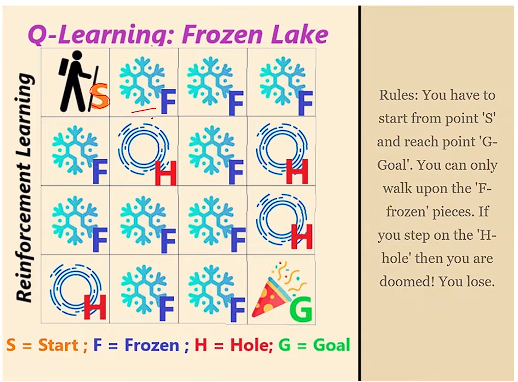

In [1]:
# !pip install gym
# Provides us lot of environments and interfaces for games.

     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
     ---- ---------------------------------- 92.2/721.7 kB 2.6 MB/s eta 0:00:01
     ----------- -------------------------- 225.3/721.7 kB 2.8 MB/s eta 0:00:01
     ------------------ ------------------- 358.4/721.7 kB 2.5 MB/s eta 0:00:01
     ------------------------- ------------ 491.5/721.7 kB 2.6 MB/s eta 0:00:01
     -------------------------------- ----- 614.4/721.7 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 721.7/721.7 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827635 sha256=3be5d9b85e44734f478f8fddf314047593f9


[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import numpy as np
import gym 
import random

In [47]:
# Creating an environment
env = gym.make('FrozenLake-v1', is_slippery = False)

In [48]:
env.action_space.n
# Agent can make 4 actions - Up, Down, Right, Left

4

In [49]:
env.observation_space.n
# Number of states in the environment = Total number of grids

16

In [50]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

# Creating a q-table with 0's as entries initially
qtable = np.zeros((state_space_size, action_space_size))
qtable

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [51]:
qtable.shape
# 16 states, 4 actions
# Agent will fill this table after each experimentation
# For each action, it will either get a positive reward or negative reward. F - Positive, H - Negative

(16, 4)

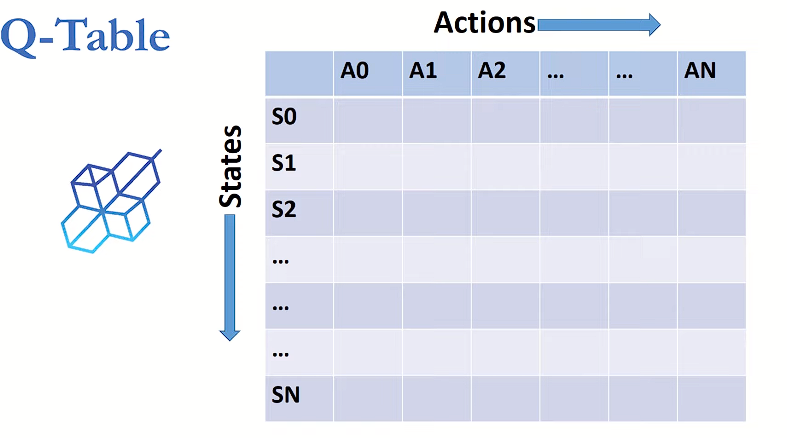

* 16 states, 4 actions.
    
* Agent will fill this table after each experimentation.
    
* For each action, it will either get a positive reward or negative reward. F - Positive, H - Negative.

In [52]:
# Hyper Parameters

# total_episodes = Number of times we are playing the game 
total_episodes = 10000 

# learning_rate: The step size for updating the Q-values (0-1). Higher learning rate - gives more importance to new values and fails to converge
learning_rate = 0.2 

# Maximum number of steps in one episode. 
max_steps = 100

# 
gamma = 0.99

# How many times we want to explore and exploit 
# Range of epsilon is (0-1). 1 - maximum explorarion.
# We will slowly reduce to decrease exploration and increase exploitation by setting decay_rate.
epsilon = 1
max_epsilon = 1
min_epsilon = 0.01
decay_rate = 0.001

In [63]:
env.reset()
# Checking the output of env.step(action)
env.step(action)

(1, 0.0, False, False, {'prob': 1.0})

In [54]:
# Create an empty list to store the rewards obtained in each episode
rewards = []

# Iterate over a predefined number of episodes
for episode in range(total_episodes):
    # Reset the environment for each episode and get the initial state
    state = env.reset()[0]  # Extract the first element from the returned tuple
    
    # Initialize step and total_rewards to 0 for each episode
    step = 0
    total_rewards = 0
    done = False

    for step in range(max_steps):
        # If epsilon is close to 0, Exploit: Pick the action with the highest Q-value for the current state
        if random.uniform(0, 1) > epsilon:
            action = np.argmax(qtable[state, :])
        # Otherwise Explore: Choose a random action
        else:
            action = env.action_space.sample()

        # Take the selected action and observe the new state and reward
        new_state, reward, done, info = env.step(action)[:4]
        
        # Ensure that state and action are integers
        state = int(state)
        action = int(action)
        new_state = int(new_state)

        # Find the maximum Q-value for the new state
        max_new_state = np.max(qtable[new_state, :])

        # Update the Q-value for the current state-action pair using the Q-learning update rule
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * max_new_state - qtable[state, action])
        
        # Update the total rewards obtained in this episode
        total_rewards += reward

        # Update the current state
        state = new_state

        # If the episode is done (either goal reached or maximum steps reached), break out of the loop
        if done:
            break

    # Update the exploration rate (epsilon) using exponential decay
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)

    # Store the total rewards obtained in this episode
    rewards.append(total_rewards)

# Calculate and print the average score over all episodes
print("Score:", str(sum(rewards) / total_episodes))

Score: 0.8793


If our agent plays the game for 100 times, it would reach the goal 87 times.

In [55]:
print(qtable)

[[0.94148015 0.95099005 0.93206535 0.94148015]
 [0.94148015 0.         0.92064808 0.93008208]
 [0.93202092 0.49341755 0.44383336 0.7546173 ]
 [0.74059141 0.         0.         0.0762372 ]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.31120538 0.         0.897052  ]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.95684632 0.99       0.         0.80167138]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


Each row in the Q-table corresponds to a state, and each column corresponds to an action. The values in the Q-table indicate the expected cumulative rewards an agent can achieve by taking a particular action in a given state.

0 - Doesn't go

Higher value - Goes


In [56]:
best_actions = np.argmax(qtable, axis=1)  # Get the best actions for each state
best_actions = best_actions.reshape(4, 4)  # Assuming a 4x4 grid
print("Learned Policy:")
print(best_actions)

Learned Policy:
[[1 0 0 0]
 [1 0 3 0]
 [2 1 1 0]
 [0 2 2 0]]


Actions are represented with integers from 0 (left) to 3 (up) ordered in anti-clockwise direction.

The actions are represented as integers: 0 for "Left," 1 for "Down," 2 for "Right," and 3 for "Up."

### Making the agent play the game after learning

In [57]:
qtable[state,action] = qtable[state,action] + learning_rate*(reward+gamma*max_new_state-qtable[state,action])

In [62]:
env.reset()

# Define action names for rendering
action_names = {0: "Left", 1: "Down", 2: "Right", 3: "Up"}

for episode in range(5):
    state = env.reset()[0]
    step = 0
    done = False
    total_rewards = 0
    print('----------------------------------------------------------')
    print("Episode:", episode + 1)

    while not done and step < max_steps:
        action = np.argmax(qtable[state, :])
        new_state, reward, done, info = env.step(action)[:4]
        total_rewards += reward

        print("Step-", step, "Action-", action_names[action], "State-", new_state, "Reward-", reward)

        state = new_state
        step += 1

    print("Number of Steps:", step)
    print("Total Rewards:", total_rewards)

env.close()

----------------------------------------------------------
Episode: 1
Step- 0 Action- Down State- 4 Reward- 0.0
Step- 1 Action- Down State- 8 Reward- 0.0
Step- 2 Action- Right State- 9 Reward- 0.0
Step- 3 Action- Down State- 13 Reward- 0.0
Step- 4 Action- Right State- 14 Reward- 0.0
Step- 5 Action- Right State- 15 Reward- 1.0
Number of Steps: 6
Total Rewards: 1.0
----------------------------------------------------------
Episode: 2
Step- 0 Action- Down State- 4 Reward- 0.0
Step- 1 Action- Down State- 8 Reward- 0.0
Step- 2 Action- Right State- 9 Reward- 0.0
Step- 3 Action- Down State- 13 Reward- 0.0
Step- 4 Action- Right State- 14 Reward- 0.0
Step- 5 Action- Right State- 15 Reward- 1.0
Number of Steps: 6
Total Rewards: 1.0
----------------------------------------------------------
Episode: 3
Step- 0 Action- Down State- 4 Reward- 0.0
Step- 1 Action- Down State- 8 Reward- 0.0
Step- 2 Action- Right State- 9 Reward- 0.0
Step- 3 Action- Down State- 13 Reward- 0.0
Step- 4 Action- Right State-

In [67]:
# Access the description of the environment
layout = env.desc

# Define symbols for different cell types
cell_symbols = {
    b'S': 'Start',  # Start cell
    b'F': 'Frozen',  # Frozen cell
    b'H': 'Hole',    # Hole cell
    b'G': 'Goal'
}

# Iterate through the environment description and print cell types
for row in layout:
    for cell in row:
        cell_type = cell_symbols.get(cell, 'Unknown')
        print(cell_type, end='\t')
    print()

Start	Frozen	Frozen	Frozen	
Frozen	Hole	Frozen	Hole	
Frozen	Frozen	Frozen	Hole	
Hole	Frozen	Frozen	Goal	


The output you provided suggests that the agent successfully reached the goal in each episode with a total reward of 1.0. The agent took a series of steps (actions) to navigate from its starting state to the goal state. The number of steps it took to reach the goal was consistent across all episodes, which is expected behavior for a solved environment like FrozenLake when using a Q-learning algorithm with a pre-trained Q-table.